##### ![UNIR](https://www.unir.net/wp-content/uploads/2014/10/logo.png)
### Máster en Inteligencia Artificial. 
**Asignatura:** _Percepción Automática._

Luisa Sánchez Avivar

**Fecha:** _12 Febrero 2020_

---

# ACTIVIDAD 3: Usos reales de la morfología matemática

___

# Inicialización

In [2]:
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_peaks, corner_harris,
                             plot_matches, BRIEF, ORB)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
import scipy.ndimage as  ndi

In [3]:
# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle

In [4]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola

from skimage.morphology import label
from skimage.measure import regionprops

In [5]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

## Cargar la imagen

In [6]:
pintura_puntos = rgb2gray(data.imread('img/Pintura_Puntos.jpg'))

# Escribe tu código aquí

## 1. Binarización
Binarizamos la imagen probando diferentes thresholds, buscando tener la imagen más uniforme con respecto a la variación de intensidad que presenta. Dos de los que mejor funcionan son _Local_ y _Niblack_

[[0.93203648 0.9266497  0.91888904 ... 0.55767749 0.53400442 0.51975467]
 [0.92905507 0.92386729 0.91657415 ... 0.57660868 0.55397739 0.54030867]
 [0.92530274 0.92047835 0.91390492 ... 0.60111272 0.57949776 0.56634071]
 ...
 [0.47703587 0.4745702  0.47045434 ... 0.15385424 0.15681655 0.15739557]
 [0.48902812 0.48631258 0.48193504 ... 0.15645293 0.15944593 0.15999741]
 [0.49484823 0.49196142 0.48744736 ... 0.15657308 0.15939734 0.15985398]]


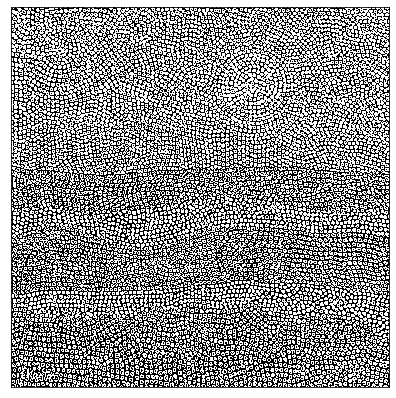

In [7]:
# Threshold y binarizacion: Local
block_size = 11
adaptive_thresh = threshold_local(pintura_puntos, block_size, 'mean')
binary_adaptive = pintura_puntos > adaptive_thresh

print(adaptive_thresh)
imshow(binary_adaptive)

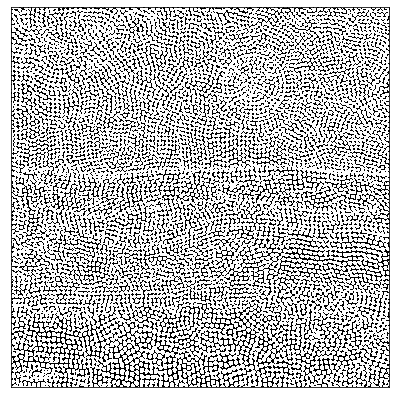

In [8]:
# Threshold y binarizacion: Niblack
window_size = 25
thresh_niblack = threshold_niblack(pintura_puntos, window_size=window_size, k=0.8)
imshow(thresh_niblack<pintura_puntos)


## 2. Opening
Usamos el operador morfológico de la apertura con el objetivo de separar los objetos y poder contarlos más facilmente. Este operador practicará primero una erosión (eliminando detalles) seguido de una dilatación (afianzando los objetos resultantes).
Como podemos ver en la imagen que hemos preprocesado con _Niblack_, la apertura elimina algunos de los objetos que queremos contar.

Opening - Local


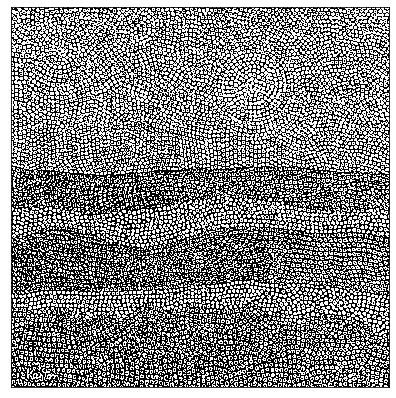

Opening - Niblack


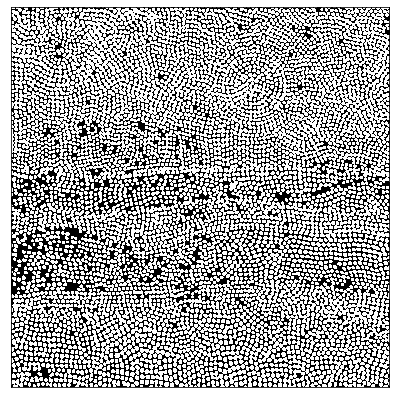

In [9]:
#Probamos la apertura con las dos imágenes y vemos los resultados
opening_img_local = opening(binary_adaptive, disk (2.75))
opening_img_niblack = opening(thresh_niblack<pintura_puntos, disk (7.6))
print("Opening - Local")
imshow(opening_img_local)
print("Opening - Niblack")
imshow(opening_img_niblack)

## 3. Conteo de puntos
Contamos los puntos de las imagenes preprocesadas. Tenemos un mejor resultado con Local

In [12]:
label_1 = ndi.label(opening_img_local)[0].max()
label_2 = ndi.label(opening_img_niblack)[0].max()

print ("Recuento con local threshold: ", label_1)
print ("Recuento con niblack threshold: ", label_2)

Recuento con local threshold:  9187
Recuento con niblack threshold:  5378


## 4. RegionProps

Suma:  1959


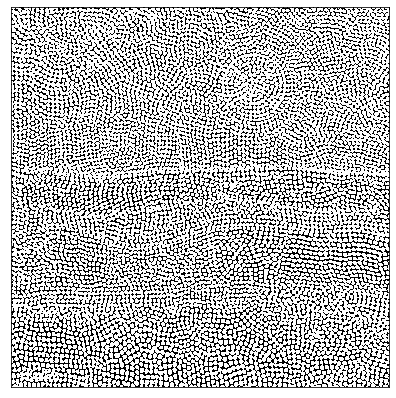

In [14]:
op_binary_niblack = opening(thresh_niblack<pintura_puntos, disk(3))
adaptative_niblack = ndi.label(op_binary_niblack)[0]
image_opening_niblack = opening(op_binary_niblack, disk(3))

add=0
img_niblack_lb = ndi.label(adaptative_niblack)[0]
for region in regionprops(img_niblack_lb):

    if region.area > 10:
        add+=1
    else:
        image_opening_niblack[img_niblack_lb==region.label] = False

print("Suma: ", add)
imshow(image_opening_niblack)

# Posible resultado

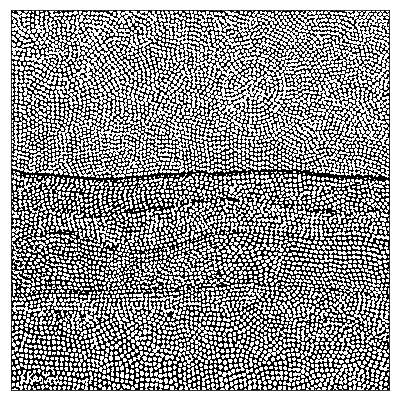

In [221]:
Posible resultado